In [ ]:
# Sales Analysis in python using Pandas
# Rahim Abdulmalik


### Goal of this project is to analyze 12 months sales data of a store and answer the following questions

1. What was the best/worst month for sales? How much was earned that month?
2. What city had the least number of sales?
3. What time should we display advertisements to maximize likelihood of customer's buying product?
4. What product sold the most and why?

In [2]:
# Libraries used

import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
# Merge 12 months of sales data into a single file

l = [pd.read_csv(filename) for filename in glob.glob("./sales analysis/*.csv")]
all_sales = pd.concat(l, axis=0)
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Preprocessing the Data to solve the questions

#### Based on the questions asked we know we are going to have to create some new columns and fix some minor issues.

In [4]:
# Clean the data

# Drop NA values/extra data
all_sales = all_sales.dropna(how='all')
all_sales.drop_duplicates(subset ="Order Date", 
                     keep = False, inplace = True) 

In [5]:
# Convert Columns to correct type
all_sales['Quantity Ordered'] = pd.to_numeric(all_sales['Quantity Ordered'])
all_sales['Price Each'] = pd.to_numeric(all_sales['Price Each'])

In [6]:
# Adding more columns

# Adding more months to data
all_sales['Order Month'] = all_sales['Order Date'].astype(str).str[0:2]
all_sales['Order Month'] = pd.to_numeric(all_sales['Order Month'])

# Add sales column
all_sales['Sales'] = all_sales['Quantity Ordered'] * all_sales['Price Each']
all_sales.head()

# Add City column
all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: f"{x.split(', ')[1]} ({x.split(' ')[-2]})")
all_sales.head()

# Add Hour Column
all_sales['Hour'] = all_sales['Order Date'].apply(lambda x: x.split(' ')[1]).apply(lambda x: x.split(':')[0])

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Hour
12,176568,Lightning Charging Cable,1,14.95,04/15/19 12:18,"438 Elm St, Seattle, WA 98101",4,14.95,Seattle (WA),12
14,176570,AA Batteries (4-pack),1,3.84,04/22/19 15:09,"186 12th St, Dallas, TX 75001",4,3.84,Dallas (TX),15
15,176571,Lightning Charging Cable,1,14.95,04/19/19 14:29,"253 Johnson St, Atlanta, GA 30301",4,14.95,Atlanta (GA),14
16,176572,Apple Airpods Headphones,1,150.00,04/04/19 20:30,"149 Dogwood St, New York City, NY 10001",4,150.00,New York City (NY),20
20,176575,AAA Batteries (4-pack),1,2.99,04/27/19 00:30,"433 Hill St, New York City, NY 10001",4,2.99,New York City (NY),00


## Answering the questions



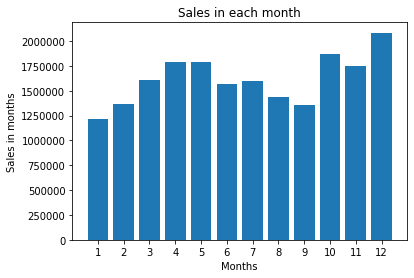

,Order Month,Quantity Ordered,Price Each,Sales
0,1,7623,1212043.98,1219943.97
8,9,8729,1350406.55,1359346.42
1,2,8622,1356209.97,1363999.68
7,8,8848,1425029.06,1434560.28
5,6,9493,1555701.79,1565344.02
6,7,10086,1589028.15,1599133.61
2,3,10209,1599963.87,1609729.92
10,11,10970,1741287.41,1752144.83
3,4,11205,1771365.00,1785638.80
4,5,10816,1782237.31,1793045.62


In [7]:
# What was the best/worst month for sales? How much was earned that month?
question1 = all_sales.groupby(['Order Month'], as_index = False).sum()

# plot results for 1
x, y = question1['Order Month'], question1['Sales']
plt.bar(x,y)
plt.xticks(x)
plt.title('Sales in each month')
plt.ylabel('Sales in months')
plt.xlabel('Months')
plt.show()

question1.sort_values(['Sales'],ascending=True)

#### For question 1 January had the least sales earning 1,219,943. And December had the most sales earning 2,085,149.

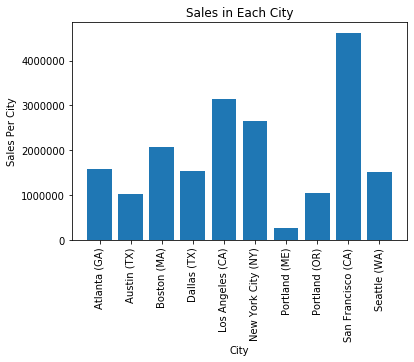

,City,Quantity Ordered,Price Each,Order Month,Sales
6,Portland (ME),1612,259111.27,9748,260630.93
1,Austin (TX),6501,1021330.76,38633,1027333.94
7,Portland (OR),6553,1038936.27,39525,1045092.33
9,Seattle (WA),9617,1506545.20,58918,1515859.88
3,Dallas (TX),9640,1517156.97,57786,1526540.35
0,Atlanta (GA),9774,1560051.45,59236,1570075.34
2,Boston (MA),13022,2062497.26,78475,2077362.91
5,New York City (NY),16196,2632292.50,98504,2649819.73
4,Los Angeles (CA),19626,3129647.18,118226,3148394.78
8,San Francisco (CA),29242,4591387.71,175939,4620064.69


In [8]:
# Which city had the least number of sales
pd.set_option('display.float_format', lambda x: '%.2f' % x)
question2 = all_sales.groupby(['City'],as_index=False).sum()

# plot results of question 2
x = question2['City']
y = question2['Sales']
plt.bar(x,y)
plt.xticks(x, rotation='vertical')
plt.title('Sales in Each City')
plt.ylabel('Sales Per City')
plt.xlabel('City')
plt.show()

question2.sort_values(['Sales'],ascending=True)

#### For question 2 Portland in Maine had the least amount of sales


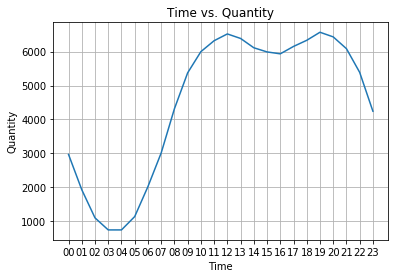

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City
19,19,6572,6572,6572,6572,6572,6572,6572,6572,6572
12,12,6522,6522,6522,6522,6522,6522,6522,6522,6522
20,20,6435,6435,6435,6435,6435,6435,6435,6435,6435
13,13,6389,6389,6389,6389,6389,6389,6389,6389,6389
18,18,6334,6334,6334,6334,6334,6334,6334,6334,6334


In [9]:
# What time should we display advertisements to maximize likelihood of customer's buying product?
question3 = all_sales.groupby(['Hour'], as_index=False).count()

# plot question 3
x = question3['Hour']
y = question3['Quantity Ordered']
plt.plot(x,y)
plt.grid()
plt.title('Time vs. Quantity')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.show()

question3.sort_values(['Quantity Ordered'],ascending=False).head()

#### For question 3, based on the chart between 11 am and 12 am, also between 6 and 7 pm would be the best time to run advertisement.

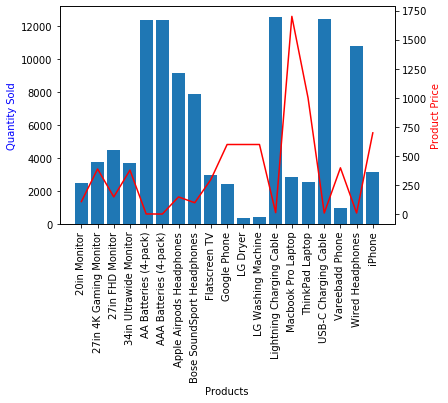

,Product,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Hour
12,Lightning Charging Cable,12584,12584,12584,12584,12584,12584,12584,12584,12584
15,USB-C Charging Cable,12478,12478,12478,12478,12478,12478,12478,12478,12478
4,AA Batteries (4-pack),12410,12410,12410,12410,12410,12410,12410,12410,12410
5,AAA Batteries (4-pack),12375,12375,12375,12375,12375,12375,12375,12375,12375
17,Wired Headphones,10792,10792,10792,10792,10792,10792,10792,10792,10792
6,Apple Airpods Headphones,9175,9175,9175,9175,9175,9175,9175,9175,9175
7,Bose SoundSport Headphones,7866,7866,7866,7866,7866,7866,7866,7866,7866
2,27in FHD Monitor,4497,4497,4497,4497,4497,4497,4497,4497,4497
1,27in 4K Gaming Monitor,3773,3773,3773,3773,3773,3773,3773,3773,3773
3,34in Ultrawide Monitor,3681,3681,3681,3681,3681,3681,3681,3681,3681


In [10]:
# What product sold the most and why
question4 = all_sales.groupby(['Product'], as_index=False).count()

# find out the price of each item
prod = all_sales.drop_duplicates(subset=['Product']).sort_values(['Product'])

# plot the results
x = question4['Product']
y = question4['Quantity Ordered']
o = prod['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x,y)
ax2.plot(x,o, color='r')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Sold', color='b')
ax2.set_ylabel('Product Price',color='r')
ax1.set_xticklabels(x,rotation='vertical')
plt.show()

question4.sort_values(['Quantity Ordered'],ascending=False)

#### For question 4 the Lightning Charging Cable sold the most.
#### Most likely due to the fact that it was relatively inexpensive compared to other products.
#### Some of the products that sold the most were the cheapest in most cases